In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
# Load dataset
data = pd.read_csv('sentiment_data.csv')

In [11]:
print(data.head(5))

                                               tweet    labels
0  ChatGPT: Optimizing Language Models for Dialog...   Neutral
1  Try talking with ChatGPT, our new AI system wh...  Positive
2  ChatGPT: Optimizing Language Models for Dialog...   Neutral
3  THRILLED to share that ChatGPT, our new model ...  Positive
4  As of 2 minutes ago, @OpenAI released their ne...  Negative


In [12]:
print(data.describe())

          tweet    labels
count    219294    219294
unique   217622         3
top     ChatGPT  Negative
freq        122    107796


In [ ]:
# import re
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# corpus = []
# for i in range(0, 219294):
#   #Remove any non-alphabetic characters from the tweet
#   tweet = re.sub('[^a-zA-Z]', ' ', data['tweet'][i])
#   #Convert the tweet to lowercase
#   tweet = tweet.lower()
#   #Split the tweet into a list of words
#   tweet = tweet.split()
#   ps = PorterStemmer()
#   #Get the list of english stopwords from nltk
#   all_stopwords = stopwords.words('english')
#   #Remove the word ‘not’ from the stopwords list as it can be useful for sentiment analysis because sometimes "not" before some keywords create a positive meaning
#   all_stopwords.remove('not')
#   #Apply stemming to each word in the tweet and remove any stopwords, and also prepositions
#   prepositions = ['to','the','a','as','in','is','of','i','it','be','this','you','that','be','on','with','for','about', 'above', 'across', 'after', 'along', 'among', 'around', 'at', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'by', 'down', 'during', 'except', 'inside', 'into', 'like', 'near', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'past', 'since', 'through', 'throughout', 'till', 'to', 'toward', 'under', 'underneath', 'until', 'up', 'upon', 'with', 'within', 'without']
#   tweet = [ps.stem(word) for word in tweet if (not word in set(all_stopwords)) and (not word in set(prepositions))]
#   #Join the words back into a single string
#   tweet = ' '.join(tweet)
#   #Append the processed tweet to the corpus list
#   corpus.append(tweet)

In [13]:


nltk.download('stopwords')

ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - {'not'}
prepositions = {'to', 'the', 'a', 'as', 'in', 'is', 'of', 'your','my','if','has','was','your','or','how','what','just','i','-','its','have', 'it', 'be', 'this', 'you', 'that', 'on','and', 'with', 'for','so','it\'s','we','me','are','are','an','but','from', 'about', 'above', 'across', 'after', 'along', 'among', 'around', 'at', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'by', 'down', 'during', 'except', 'inside', 'into', 'like', 'near', 'off', 'onto', 'out', 'outside', 'over', 'past', 'since', 'through', 'throughout', 'till', 'toward', 'under', 'underneath', 'until', 'up', 'upon', 'within', 'without'}
corpus = []
for tweet in data['tweet']:
    # Remove any non-alphabetic characters from the tweet
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    # Convert the tweet to lowercase
    tweet = tweet.lower()
    # Split the tweet into a list of words
    words = tweet.split()
    # Apply stemming to each word in the tweet and remove any stopwords and prepositions
    words = [ps.stem(word) for word in words if word not in stop_words and word not in prepositions]
    # Join the words back into a single string
    processed_tweet = ' '.join(words)
    # Append the processed tweet to the corpus list
    corpus.append(processed_tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hossein.glm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
#Create a count vectorizer object with a maximum of 11000 features (words)
cv = CountVectorizer(max_features = 20000)
#Fit and transform the corpus into a sparse matrix of word counts
X = cv.fit_transform(corpus).toarray()
#Get the target variable (sentiment) from the data as a numpy array
y = data.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#Create a multinomial naive bayes classifier object and Fit the classifier on the training data

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [17]:
# Predict the sentiment labels for the test data using the classifier
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[27538  2608  2374]
 [ 4957  6584  5125]
 [ 1221  2786 12596]]


0.7101187128547326

In [19]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['tweet'])

In [20]:
# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

    Negative       0.82      0.85      0.83     32520
     Neutral       0.55      0.40      0.46     16666
    Positive       0.63      0.76      0.69     16603

    accuracy                           0.71     65789
   macro avg       0.66      0.67      0.66     65789
weighted avg       0.70      0.71      0.70     65789



<Axes: xlabel='labels', ylabel='count'>

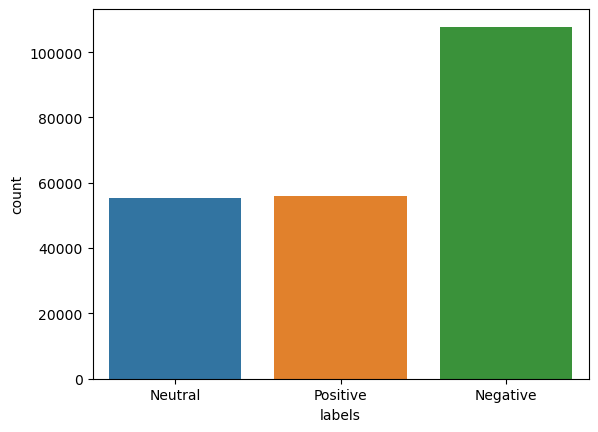

In [21]:
# Distribution of sentiment labels
sns.countplot(x='labels', data=data)

<Axes: xlabel='tweet_length', ylabel='Count'>

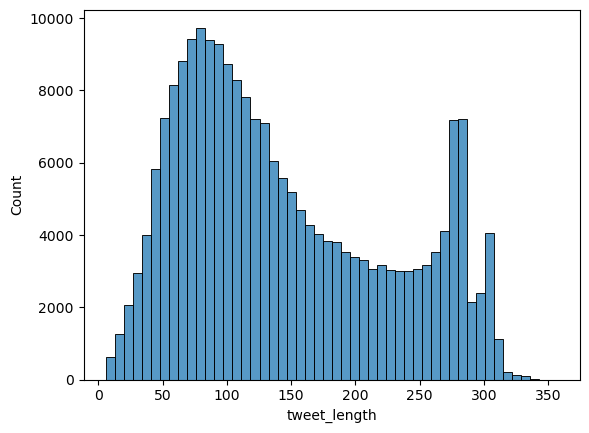

In [22]:
# Distribution of tweet lengths
data['tweet_length'] = data['tweet'].apply(len)
sns.histplot(x='tweet_length', data=data, bins=50)

<Axes: >

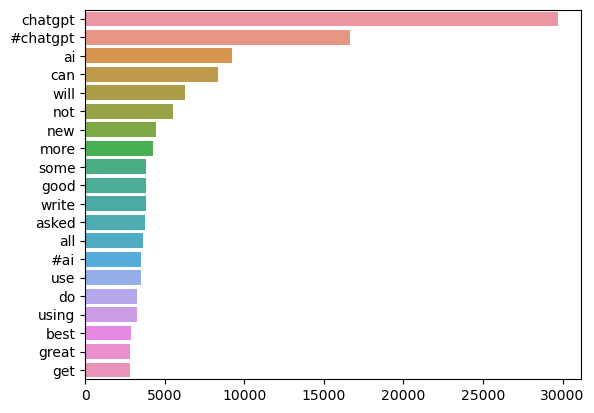

In [23]:
# Top 20 most common words in positive tweets
positive_tweets = data[data['labels'] == 'Positive']
positive_word_freq = pd.Series(' '.join(positive_tweets['tweet']).lower().split()).value_counts().drop(prepositions)
top_positive_words = positive_word_freq.head(20)
sns.barplot(x=top_positive_words.values, y=top_positive_words.index)

<Axes: >

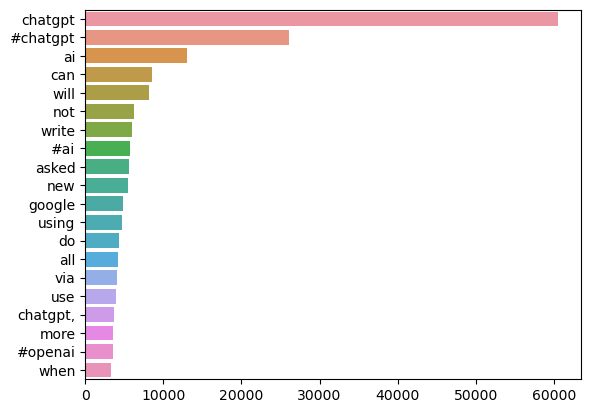

In [24]:
# Top 20 most common words in negative tweets
negative_tweets = data[data['labels'] == 'Negative']
negative_word_freq = pd.Series(' '.join(negative_tweets['tweet']).lower().split()).value_counts().drop(prepositions)
top_negative_words = negative_word_freq.head(20)
sns.barplot(x=top_negative_words.values, y=top_negative_words.index)